<a href="https://colab.research.google.com/github/imene-swaan/Twitter-sentiment-analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving test_tweets_anuFYb8.csv to test_tweets_anuFYb8.csv
Saving train_E6oV3lV.csv to train_E6oV3lV.csv


In [7]:
import io

train = pd.read_csv(io.BytesIO(uploaded['train_E6oV3lV.csv']))
test  = pd.read_csv(io.BytesIO(uploaded['test_tweets_anuFYb8.csv']))

## Data Inspection

Let’s check out a few non racist/sexist tweets.

In [9]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


Now check out a few racist/sexist tweets.

In [10]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


There are quite a many words and characters which are not really required. So, we will try to keep only those words which are important and add value.

Let’s check dimensions of the train and test dataset.

In [11]:
train.shape, test.shape

((31962, 3), (17197, 2))

Train set has 31,962 tweets and test set has 17,197 tweets.

Let’s have a glimpse at label-distribution in the train dataset.

In [12]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

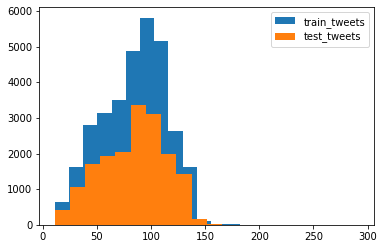

In [13]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

## Data Cleaning

Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [14]:
combi = train.append(test, ignore_index=True) 
combi.shape

(49159, 3)

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [15]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

We will be following the steps below to clean the raw tweets in out data.

We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.

Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.

Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.

### 1. Removing Twitter Handles (@user)

Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [16]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### 2. Removing Punctuations, Numbers, and Special Characters

Here we will replace everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [17]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


### 3. Removing Short Words

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [18]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


You can see the difference between the raw tweets and the cleaned tweets (tidy_tweet) quite clearly. Only the important words in the tweets have been retained and the noise (numbers, punctuations, and special characters) has been removed.

### 4. Text Normalization 

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [19]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets.

In [20]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet
combi['tidy_tweet'].head()

0                  when father dysfunct selfish drag kid into dysfunct #run
1    thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                       bihday your majesti
3                                                #model love take with time
4                                                  factsguid societi #motiv
Name: tidy_tweet, dtype: object

## Data Visualization

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

- What are the most common words in the entire dataset?
- What are the most common words in the dataset for negative and positive tweets, respectively?
- How many hashtags are there in a tweet?
- Which trends are associated with my dataset?
- Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

### A) Understanding the common words used in the tweets: WordCloud

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot

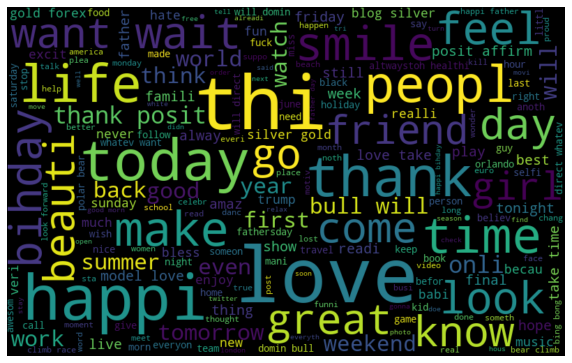

In [22]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 

from wordcloud import WordCloud 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

### B) Words in non racist/sexist tweets

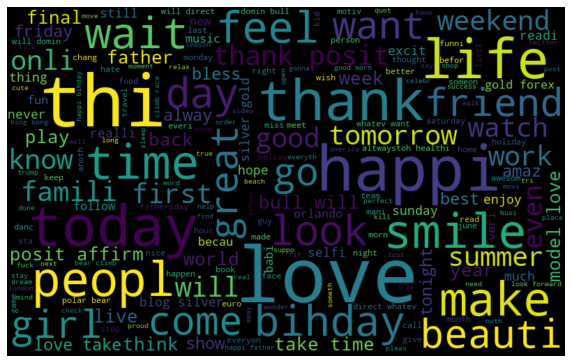

In [23]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

### C) Racist/Sexist Tweets

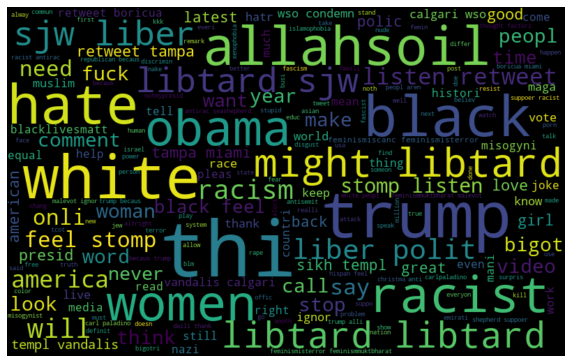

In [24]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

### D) Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset:

![1549270413951.png](attachment:1549270413951.png)

The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [25]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [26]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 

# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 

# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

#### Non-Racist/Sexist Tweets

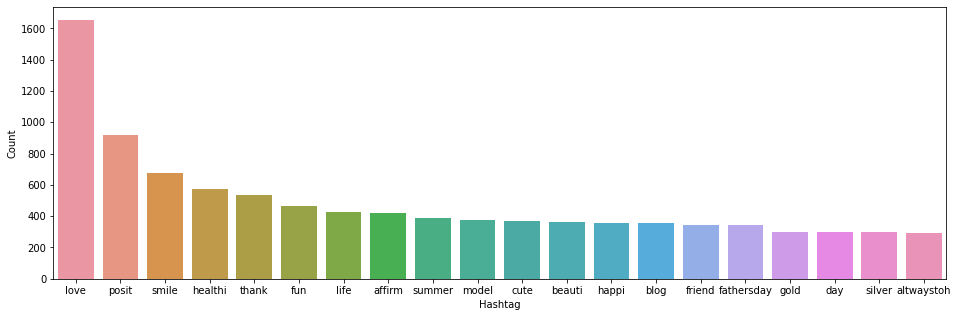

In [27]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20)

plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

#### Racist/Sexist Tweets

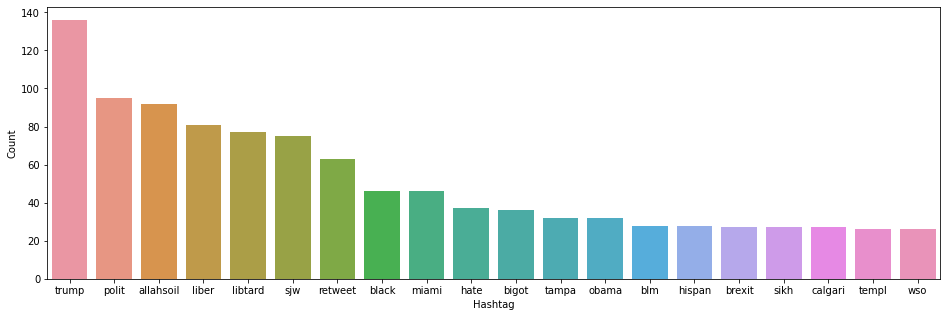

In [28]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 

# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

## Bag-of-Words Features

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [30]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(49159, 1000)

## TF-IDF Features

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(49159, 1000)

## Word2Vec Features

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen

### 1. Word2Vec Embeddings

Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

Let’s train a Word2Vec model on our corpus.

In [32]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510404, 7536020)

Let’s play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus

In [33]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.583328366279602),
 ('#avocado', 0.5722177624702454),
 ('lukey', 0.560131847858429),
 ('#toast', 0.5551902055740356),
 ('#cellar', 0.5537289977073669),
 ('#brunch', 0.5466462969779968),
 ('dess', 0.542861819267273),
 ('burrito', 0.5356166362762451),
 ('#biall', 0.5330096483230591),
 ('noodl', 0.5324525237083435)]

In [34]:
model_w2v.wv.most_similar(positive="trump")

[('phoni', 0.5496503114700317),
 ('nomine', 0.5431311130523682),
 ('unstabl', 0.541689395904541),
 ('donald', 0.5410376191139221),
 ('jibe', 0.5357115268707275),
 ('unfavor', 0.5340325236320496),
 ('tomlin', 0.5283633470535278),
 ('#delegaterevolt', 0.5282288789749146),
 ('melo', 0.5234930515289307),
 ('irrefut', 0.5232018232345581)]

From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most similar vectors (words).

#### Preparing Vectors for Tweets

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [35]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [36]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 

wordvec_df.shape

(49159, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

### 2. Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

In [37]:
from gensim.models.doc2vec import LabeledSentence

To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.

In [38]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

Let’s have a look at the result.

In [39]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

Now let’s train a doc2vec model.

In [40]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
                                  vector_size=200, # no. of desired features                                  
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used                                 
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=3, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23)
model_d2v.build_vocab([i for i in labeled_tweets])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

Preparing doc2vec Feature Set

In [41]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

## Modeling

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

- Logistic Regression
- Support Vector Machine
- RandomForest
- XGBoost

> Evaluation Metric: 
       **F1 score** is being used as the evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

### Bag-of-Words Features

In [43]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 

# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
lreg = LogisticRegression() 

# training the model 
lreg.fit(xtrain_bow, ytrain) 

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5303408146300915

### TF-IDF Features

In [44]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 

xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain) 

prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5451327433628319

### Word2Vec Features

In [45]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain) 

prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int)

0.615840118430792

### Doc2Vec Features

In [46]:
train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:] 

xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

lreg.fit(xtrain_d2v, ytrain) 

prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int)

0.37237762237762234

## Support Vector Machine (SVM)

In [47]:
from sklearn import svm

### Bag-of-Words Features

In [48]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 

prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5088536812674744

### TF-IDF Features

In [49]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain) 

prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int)

0.5100182149362478

### Word2Vec Features

In [50]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 

prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int)

0.621941594317285

### Doc2Vec Features

In [51]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 

prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int)

0.16321559074299635

## RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier

### Bag-of-Words Features

In [53]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 

prediction = rf.predict(xvalid_bow) 

f1_score(yvalid, prediction)

0.5529225908372828

### TF-IDF Features

In [54]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 

prediction = rf.predict(xvalid_tfidf) 

f1_score(yvalid, prediction)

0.562152133580705

### Word2Vec Features

In [55]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 

prediction = rf.predict(xvalid_w2v) 

f1_score(yvalid, prediction)

0.5037674919268029

### Doc2Vec Features

In [56]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 

prediction = rf.predict(xvalid_d2v) 

f1_score(yvalid, prediction)

0.06751054852320675

## XGBoost

In [57]:
from xgboost import XGBClassifier

### Bag-of-Words Features

In [58]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 

prediction = xgb_model.predict(xvalid_bow) 

f1_score(yvalid, prediction)

0.5130687318489837

### TF-IDF Features

In [59]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf) 

f1_score(yvalid, prediction)

0.5185891325071497

### Word2Vec Features

In [60]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)

prediction = xgb.predict(xvalid_w2v) 

f1_score(yvalid, prediction)

0.6510791366906475

### Doc2Vec Features

In [61]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain)

prediction = xgb.predict(xvalid_d2v)

f1_score(yvalid, prediction)

0.33979475484606614

## Results :

|  | Logistic Regression | SVM      | RandomForest       | XGBoost       |
|:--------:|  :-----------:  |  :-----------:  |  :-----------:  |  :-----------:  |
| Bag of words      | 0.53       | 0.51       | 0.55       | 0.51       |
| TF-IDF   | 0.55        | 0.51        | 0.56        | 0.52        |
| Word2Vec | 0.61       | 0.62        | 0.50        | 0.65        |
| Doc2Vec  | 0.39        | 0.16        | 0.07        | 0.34       |

## FineTuning XGBoost + Word2Vec

XGBoost with Word2Vec model has given us the best performance so far. Let’s try to tune it further to extract as much from it as we can. XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them. This is what we are going to do in the following steps.

In [62]:
import xgboost as xgb

Here we will use DMatrices. A DMatrix can contain both the features and the target.

In [63]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

We will prepare a custom evaluation function to calculate F1 score.

In [64]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

### General Approach for Parameter Tuning

We will follow the steps below to tune the parameters:

- Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.

- Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

- Tune the learning rate.

- Finally tune gamma to avoid overfitting.

#### Tuning max_depth and min_child_weight

In [66]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]

In [69]:
max_f1 = 0.
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
  print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))
  params['max_depth'] = max_depth
  params['min_child_weight'] = min_child_weight
  cv_results = xgb.cv(params, dtrain, feval= custom_eval, num_boost_round=200, maximize=True, seed=16, nfold=5, early_stopping_rounds=10)     
  mean_f1 = cv_results['test-f1_score-mean'].max()
  boost_rounds = cv_results['test-f1_score-mean'].argmax()    
  print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
  if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
	F1 Score 0.6724824 for 51 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.6721991999999999 for 44 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.6593546 for 29 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6795640000000001 for 52 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6803214 for 47 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.6784262 for 52 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.671747 for 74 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6802871999999999 for 44 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6691528 for 49 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6770912 for 52 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6740790000000001 for 61 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6749370000000001 for 74 rounds
Best params: 7, 6, F1 Score: 0.6803214


In [70]:
params['max_depth'] = 7 
params['min_child_weight'] = 6

In [71]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]

In [73]:
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
  print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
  params['colsample'] = colsample
  params['subsample'] = subsample
  cv_results = xgb.cv(params, dtrain, feval= custom_eval, num_boost_round=200, maximize=True, seed=16, nfold=5, early_stopping_rounds=10)
  mean_f1 = cv_results['test-f1_score-mean'].max()
  boost_rounds = cv_results['test-f1_score-mean'].argmax()
  print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
  if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
	F1 Score 0.665387 for 83 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.665387 for 83 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.665387 for 83 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.665387 for 83 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.665387 for 83 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6602060000000001 for 40 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6602060000000001 for 40 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6602060000000001 for 40 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6602060000000001 for 40 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6602060000000001 for 40 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6668776000000001 for 46 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6668776000000001 for 46 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6668776000000001 for 46 rounds
CV with su

In [74]:
params['subsample'] = 0.8 
params['colsample_bytree'] = 0.5

#### Now let’s tune the learning rate.

In [75]:
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.6727278 for 47 rounds
CV with eta=0.2
	F1 Score 0.6725138 for 79 rounds
CV with eta=0.1
	F1 Score 0.6946862 for 155 rounds
CV with eta=0.05
	F1 Score 0.6757084000000001 for 156 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.1, F1 Score: 0.6946862


In [76]:
params['eta'] = 0.1

Let’s have a look at the final list of tuned parameters.

{'colsample': 0.8,

'colsample_bytree': 0.5, 'eta': 0.1,

'max_depth': 7, 'min_child_weight': 6,

'objective': 'binary:logistic',

'subsample': 0.8}

Finally we can now use these tuned parameters in our xgboost model. We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.

In [77]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.06205	Validation-f1_score:0.133165
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.057775	Validation-f1_score:0.133165
[2]	Validation-error:0.055585	Validation-f1_score:0.133165
[3]	Validation-error:0.054855	Validation-f1_score:0.133165
[4]	Validation-error:0.054646	Validation-f1_score:0.133165
[5]	Validation-error:0.054125	Validation-f1_score:0.366773
[6]	Validation-error:0.054542	Validation-f1_score:0.469805
[7]	Validation-error:0.054229	Validation-f1_score:0.52452
[8]	Validation-error:0.053812	Validation-f1_score:0.559179
[9]	Validation-error:0.05329	Validation-f1_score:0.577749
[10]	Validation-error:0.053395	Validation-f1_score:0.581843
[11]	Validation-error:0.053603	Validation-f1_score:0.589235
[12]	Validation-error:0.05256	Validation-f1_score:0.588751
[13]	Validation-error:0.051935	Validation-f1_score:0.590164
[14]	Valida